In [22]:
# Common imports
import numpy as np
import pylab as pl
import pandas as pd
import geopandas as gp
from sklearn.cluster import KMeans
from sklearn.mixture import GMM
from mpl_toolkits.mplot3d import Axes3D
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


## Assignment 1

In [2]:
data_dup = pd.read_csv('original_with_duplicates_noid.csv')

days = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
races = ['asian','black','hispanic','other','white','native.american']
builds = ['unknown','thin','medium','muscular','heavy']
housings = ['neither','housing','transit']

data_dup['found.weapon']             = data_dup['found.weapon']            .map(lambda x: 1 if x == True else 0)
data_dup['found.gun']                = data_dup['found.gun']               .map(lambda x: 1 if x == True else 0)
data_dup['arrested']                 = data_dup['arrested']                .map(lambda x: 1 if x == True else 0)
data_dup['suspect.race']             = data_dup['suspect.race']            .map(lambda x: races.index(x))
data_dup['suspect.build']            = data_dup['suspect.build']           .map(lambda x: builds.index(x))
data_dup['suspect.sex']              = data_dup['suspect.sex']             .map(lambda x: 1 if x == 'male' else 0)
data_dup['stopped.bc.desc']          = data_dup['stopped.bc.desc']         .map(lambda x: 1 if x == True else 0)
data_dup['stopped.bc.violent']       = data_dup['stopped.bc.violent']      .map(lambda x: 1 if x == True else 0)
data_dup['stopped.bc.object']        = data_dup['stopped.bc.object']       .map(lambda x: 1 if x == True else 0)
data_dup['stopped.bc.other']         = data_dup['stopped.bc.other']        .map(lambda x: 1 if x == True else 0)
data_dup['stopped.bc.casing']        = data_dup['stopped.bc.casing']       .map(lambda x: 1 if x == True else 0)
data_dup['stopped.bc.lookout']       = data_dup['stopped.bc.lookout']      .map(lambda x: 1 if x == True else 0)
data_dup['stopped.bc.drugs']         = data_dup['stopped.bc.drugs']        .map(lambda x: 1 if x == True else 0)
data_dup['stopped.bc.clothing']      = data_dup['stopped.bc.clothing']     .map(lambda x: 1 if x == True else 0)
data_dup['stopped.bc.furtive']       = data_dup['stopped.bc.furtive']      .map(lambda x: 1 if x == True else 0)
data_dup['stopped.bc.bulge']         = data_dup['stopped.bc.bulge']        .map(lambda x: 1 if x == True else 0)
data_dup['inside.outside']           = data_dup['inside.outside']          .map(lambda x: 1 if x == True else 0)
data_dup['location.housing']         = data_dup['location.housing']        .map(lambda x: housings.index(x))
data_dup['officer.uniform']          = data_dup['officer.uniform']         .map(lambda x: 1 if x == True else 0)
data_dup['additional.report']        = data_dup['additional.report']       .map(lambda x: 1 if x == True else 0)
data_dup['additional.investigation'] = data_dup['additional.investigation'].map(lambda x: 1 if x == True else 0)
data_dup['additional.proximity']     = data_dup['additional.proximity']    .map(lambda x: 1 if x == True else 0)
data_dup['additional.evasive']       = data_dup['additional.evasive']      .map(lambda x: 1 if x == True else 0)
data_dup['additional.associating']   = data_dup['additional.associating']  .map(lambda x: 1 if x == True else 0)
data_dup['additional.direction']     = data_dup['additional.direction']    .map(lambda x: 1 if x == True else 0)
data_dup['additional.highcrime']     = data_dup['additional.highcrime']    .map(lambda x: 1 if x == True else 0)
data_dup['additional.time']          = data_dup['additional.time']         .map(lambda x: 1 if x == True else 0)
data_dup['additional.sights']        = data_dup['additional.sights']       .map(lambda x: 1 if x == True else 0)
data_dup['additional.other']         = data_dup['additional.other']        .map(lambda x: 1 if x == True else 0)
data_dup['radio.run']                = data_dup['radio.run']               .map(lambda x: 1 if x == True else 0)
data_dup['day']                      = data_dup['day']                     .map(lambda x: days.index(x))
data_dup['month']                    = data_dup['month']                   .map(lambda x: months.index(x) + 1)

In [3]:
for i in range(990,1011):
    KM = KMeans(n_clusters=i)
    labels_dup = KM.fit_predict(data_dup)
    act_score = KM.score(data_dup)
    print "The number of unique elements according to K means:", len(np.unique(labels_dup))
    print i,act_score

The number of unique elements according to K means: 990
990 -34.784722222
The number of unique elements according to K means: 991
991 -28.770833333
The number of unique elements according to K means: 992
992 -23.270833333
The number of unique elements according to K means: 993
993 -17.770833333
The number of unique elements according to K means: 994
994 -12.739583333
The number of unique elements according to K means: 995
995 -8.18402777705
The number of unique elements according to K means: 996
996 -4.01388888806
The number of unique elements according to K means: 997
997 -0.0
The number of unique elements according to K means: 997
998 -0.0
The number of unique elements according to K means: 997
999 -0.0
The number of unique elements according to K means: 997
1000 -0.0
The number of unique elements according to K means: 997
1001 -0.0
The number of unique elements according to K means: 997
1002 -0.0
The number of unique elements according to K means: 997
1003 -0.0
The number of unique 

In [4]:
print "The number of unique elements according to pandas:", len(data_dup[~data_dup.duplicated()])

The number of unique elements according to pandas: 997


For this assignment, First I convert everything to numeric. Month to number of month, day of week to 0..6 number, True and False to 1 and 0. Also Races and Builds to a numeric based. Then I used K-means, with number of clusters from 990 to 1010 (slightly lower and higher than 1000) and look for the best number of scores with all the data. On each iteration I also get the unique number of labels and it stop growin at 997 together with a score of 0.0. So the number of unique elements according to K-means is 997. Then compare with pandas excluding duplicate and got the same result.

## Assignment 2

In [5]:
data_err = pd.read_csv('original_with_errors_noid.csv')

In [6]:
data_err['found.weapon']             = data_err['found.weapon']            .map(lambda x: 1 if x == True else 0)
data_err['found.gun']                = data_err['found.gun']               .map(lambda x: 1 if x == True else 0)
data_err['arrested']                 = data_err['arrested']                .map(lambda x: 1 if x == True else 0)
data_err['suspect.race']             = data_err['suspect.race']            .map(lambda x: races.index(x))
data_err['suspect.build']            = data_err['suspect.build']           .map(lambda x: builds.index(x))
data_err['suspect.sex']              = data_err['suspect.sex']             .map(lambda x: 1 if x == 'male' else 0)
data_err['stopped.bc.desc']          = data_err['stopped.bc.desc']         .map(lambda x: 1 if x == True else 0)
data_err['stopped.bc.violent']       = data_err['stopped.bc.violent']      .map(lambda x: 1 if x == True else 0)
data_err['stopped.bc.object']        = data_err['stopped.bc.object']       .map(lambda x: 1 if x == True else 0)
data_err['stopped.bc.other']         = data_err['stopped.bc.other']        .map(lambda x: 1 if x == True else 0)
data_err['stopped.bc.casing']        = data_err['stopped.bc.casing']       .map(lambda x: 1 if x == True else 0)
data_err['stopped.bc.lookout']       = data_err['stopped.bc.lookout']      .map(lambda x: 1 if x == True else 0)
data_err['stopped.bc.drugs']         = data_err['stopped.bc.drugs']        .map(lambda x: 1 if x == True else 0)
data_err['stopped.bc.clothing']      = data_err['stopped.bc.clothing']     .map(lambda x: 1 if x == True else 0)
data_err['stopped.bc.furtive']       = data_err['stopped.bc.furtive']      .map(lambda x: 1 if x == True else 0)
data_err['stopped.bc.bulge']         = data_err['stopped.bc.bulge']        .map(lambda x: 1 if x == True else 0)
data_err['inside.outside']           = data_err['inside.outside']          .map(lambda x: 1 if x == True else 0)
data_err['location.housing']         = data_err['location.housing']        .map(lambda x: housings.index(x))
data_err['officer.uniform']          = data_err['officer.uniform']         .map(lambda x: 1 if x == True else 0)
data_err['additional.report']        = data_err['additional.report']       .map(lambda x: 1 if x == True else 0)
data_err['additional.investigation'] = data_err['additional.investigation'].map(lambda x: 1 if x == True else 0)
data_err['additional.proximity']     = data_err['additional.proximity']    .map(lambda x: 1 if x == True else 0)
data_err['additional.evasive']       = data_err['additional.evasive']      .map(lambda x: 1 if x == True else 0)
data_err['additional.associating']   = data_err['additional.associating']  .map(lambda x: 1 if x == True else 0)
data_err['additional.direction']     = data_err['additional.direction']    .map(lambda x: 1 if x == True else 0)
data_err['additional.highcrime']     = data_err['additional.highcrime']    .map(lambda x: 1 if x == True else 0)
data_err['additional.time']          = data_err['additional.time']         .map(lambda x: 1 if x == True else 0)
data_err['additional.sights']        = data_err['additional.sights']       .map(lambda x: 1 if x == True else 0)
data_err['additional.other']         = data_err['additional.other']        .map(lambda x: 1 if x == True else 0)
data_err['radio.run']                = data_err['radio.run']               .map(lambda x: 1 if x == True else 0)
data_err['day']                      = data_err['day']                     .map(lambda x: days.index(x))
data_err['month']                    = data_err['month']                   .map(lambda x: months.index(x) + 1)

In [7]:
for i in range(990,1011):
    KM = KMeans(n_clusters=i)
    labels_err = KM.fit_predict(data_err)
    act_score = KM.score(data_err)
    print("Number of unique elements via clustering:", len(np.unique(labels_err)))
    print i,act_score

('Number of unique elements via clustering:', 990)
990 -894.247106479
('Number of unique elements via clustering:', 991)
991 -881.650462959
('Number of unique elements via clustering:', 992)
992 -874.159374998
('Number of unique elements via clustering:', 993)
993 -866.027777779
('Number of unique elements via clustering:', 994)
994 -843.490277781
('Number of unique elements via clustering:', 995)
995 -837.010069451
('Number of unique elements via clustering:', 996)
996 -819.94849538
('Number of unique elements via clustering:', 997)
997 -814.977430569
('Number of unique elements via clustering:', 998)
998 -802.076620376
('Number of unique elements via clustering:', 999)
999 -781.022222234
('Number of unique elements via clustering:', 1000)
1000 -770.723379628
('Number of unique elements via clustering:', 1001)
1001 -752.12152777
('Number of unique elements via clustering:', 1002)
1002 -748.318865747
('Number of unique elements via clustering:', 1003)
1003 -747.827546299
('Number of un

In [8]:
import itertools as it

In [9]:
# Create a List of Combination of Columns taking out 2
colcomb = []
colcomb += it.combinations(data_err.columns,38)
ncomb =  len(colcomb)
#this is created only to show which two colums are not present for each combination
Compcolcomb = [[]] * ncomb
for i in range(0,ncomb):
    Compcolcomb[i] = list(set(array(data_err.columns)) -  set(colcomb[i]))

In [10]:
FoundCols = []
Results = [[] for i in range(ncomb)]
for i in range(ncomb-1,-1,-1):
    act_data_err = data_err[list(colcomb[i])]
    for j in range(990,1011):
        KM = KMeans(n_clusters=j)
        labels_err = KM.fit_predict(act_data_err)
        act_score = KM.score(act_data_err)
        Results[i].append([j,act_score])
    Results[i] = sorted(Results[i], key=lambda x: x[1], reverse=True)
    FoundCols.append([Compcolcomb[i][0],Results[i][0]])
    print ("for column ""{0}"", best K mean: {1}, with score of: {2}".format(Compcolcomb[i][0],Results[i][0][0],Results[i][0][1]))
FoundCols = sorted(FoundCols, key=lambda x: x[1][1],reverse=True)

for column year, best K mean: 1010, with score of: -638.119791667
for column found.weapon, best K mean: 1010, with score of: -646.011574073
for column found.gun, best K mean: 1009, with score of: -649.691550928
for column arrested, best K mean: 1009, with score of: -655.495601853
for column suspect.race, best K mean: 1010, with score of: -631.197916675
for column suspect.age, best K mean: 1010, with score of: -344.446759262
for column suspect.build, best K mean: 1010, with score of: -637.511574076
for column suspect.sex, best K mean: 1010, with score of: -644.141203712
for column suspect.height, best K mean: 1010, with score of: -646.5
for column suspect.weight, best K mean: 1010, with score of: -178.861111115
for column stopped.bc.desc, best K mean: 1010, with score of: -648.181134267
for column stopped.bc.violent, best K mean: 1010, with score of: -645.045717602
for column stopped.bc.other, best K mean: 1010, with score of: -634.201388894
for column stopped.bc.object, best K mean: 10

/Users/arp504/anaconda/lib/python2.7/site-packages/sklearn/cluster/k_means_.py:881: RuntimeWarning: Got data type int64, converted to float to avoid overflows
  X = self._check_test_data(X)


In [11]:
#Take the first 5 cols with lower (higher) score
NewCols = []
for i in range(0,5):
    NewCols.append(FoundCols[i][0])
print NewCols

['suspect.weight', 'precinct', 'suspect.age', 'month', 'day']


In [12]:
Compcolcomb2 = []
Compcolcomb2 += it.combinations(NewCols,2)
Compcolcomb2 = array(Compcolcomb2)
ncomb2 = len(Compcolcomb2)
colcomb2 = [[] for i in range(ncomb2)]
for i in range(0,ncomb2):
    colcomb2[i] = list(set(array(data_err.columns)) - set(Compcolcomb2[i]))

In [13]:
FoundCols2 = []
Results2 = [[] for i in range(ncomb2)]
for i in range(0,ncomb2):
    act_data_err2 = data_err[list(colcomb2[i])]
    for j in range(990,1011):
        KM = KMeans(n_clusters=j)
        labels_err = KM.fit_predict(act_data_err2)
        act_score = KM.score(act_data_err2)
        Results2[i].append([j,act_score])
    Results2[i] = sorted(Results2[i], key=lambda x: x[1], reverse=True)
    FoundCols2.append([Compcolcomb2[i],Results2[i][0],])
    print ("for columns ""{0}"" and ""{1}"", best K mean: {2}, with score of: {3}".format(Compcolcomb2[i][0],Compcolcomb2[i][1],Results2[i][0][0],Results2[i][0][1]))
FoundCols2 = sorted(FoundCols2, key=lambda x: x[1][1],reverse=True)

for columns suspect.weight and precinct, best K mean: 1010, with score of: -124.767361121
for columns suspect.weight and suspect.age, best K mean: 997, with score of: -0.0
for columns suspect.weight and month, best K mean: 1010, with score of: -135.09490741
for columns suspect.weight and day, best K mean: 1010, with score of: -149.872685195
for columns precinct and suspect.age, best K mean: 1010, with score of: -185.024884271
for columns precinct and month, best K mean: 1010, with score of: -237.853587969
for columns precinct and day, best K mean: 1010, with score of: -267.196759262
for columns suspect.age and month, best K mean: 1009, with score of: -230.910879631
for columns suspect.age and day, best K mean: 1010, with score of: -245.59027778
for columns month and day, best K mean: 1010, with score of: -368.050925929


In [14]:
problem_columns = list(FoundCols2[0][0])
number_of_unique_stops = FoundCols2[0][1][0]
print "The problem columns are: ",problem_columns
print "the number of unique stops are:",number_of_unique_stops

The problem columns are:  ['suspect.weight', 'suspect.age']
the number of unique stops are: 997


In this case, after also converting everything to number as in assignment 1, there are two unknown features that make the points not being in the same "place". Eventhough I tried to do the same procedure as in assignment 1, but it didn't work because this two problem columns. For that reason, I started doing the clustering taking out one feature at a time, using K-means with number of clusters from 990 to 1010 (for the same reason that in assignment 1). So, it makes 39 features times 21 number of clusters, 819 iterations, but for every feature I collect the best score and the number of unique labels that makes it possible. Once they are done, I collect the 5 features with the best score. With this 5 features (columns) I build up all combinations with two columns, that makes 10 iterations of two different columns in this list. Then extract them from the total columns, and with this result set of columns I start again the process of clustering, but this time it is only 10 iterations of two columns extracted each times 21 number of clusters. So finally I got both answer with this process, the problem columns and the number of unique stops.

## Assignment 3

In [60]:
from datetime import datetime, date,time
data = pd.read_csv('cpw_stops_2012_with_date.csv')
data = data.convert_objects(convert_numeric=True)

In [61]:
data['day']   = data['day']  .map(lambda x: days.index(x))
data['month'] = data['month'].map(lambda x: months.index(x) + 1)
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')
data['date'] = (data['date'] - data['date'].min())  / np.timedelta64(1,'D') + ((data['time.period'] - 1) / 6)
data['date'] = data['date'] / 366.0

In [62]:
data1 = data[['date','lat','lon']]

(0, 1)

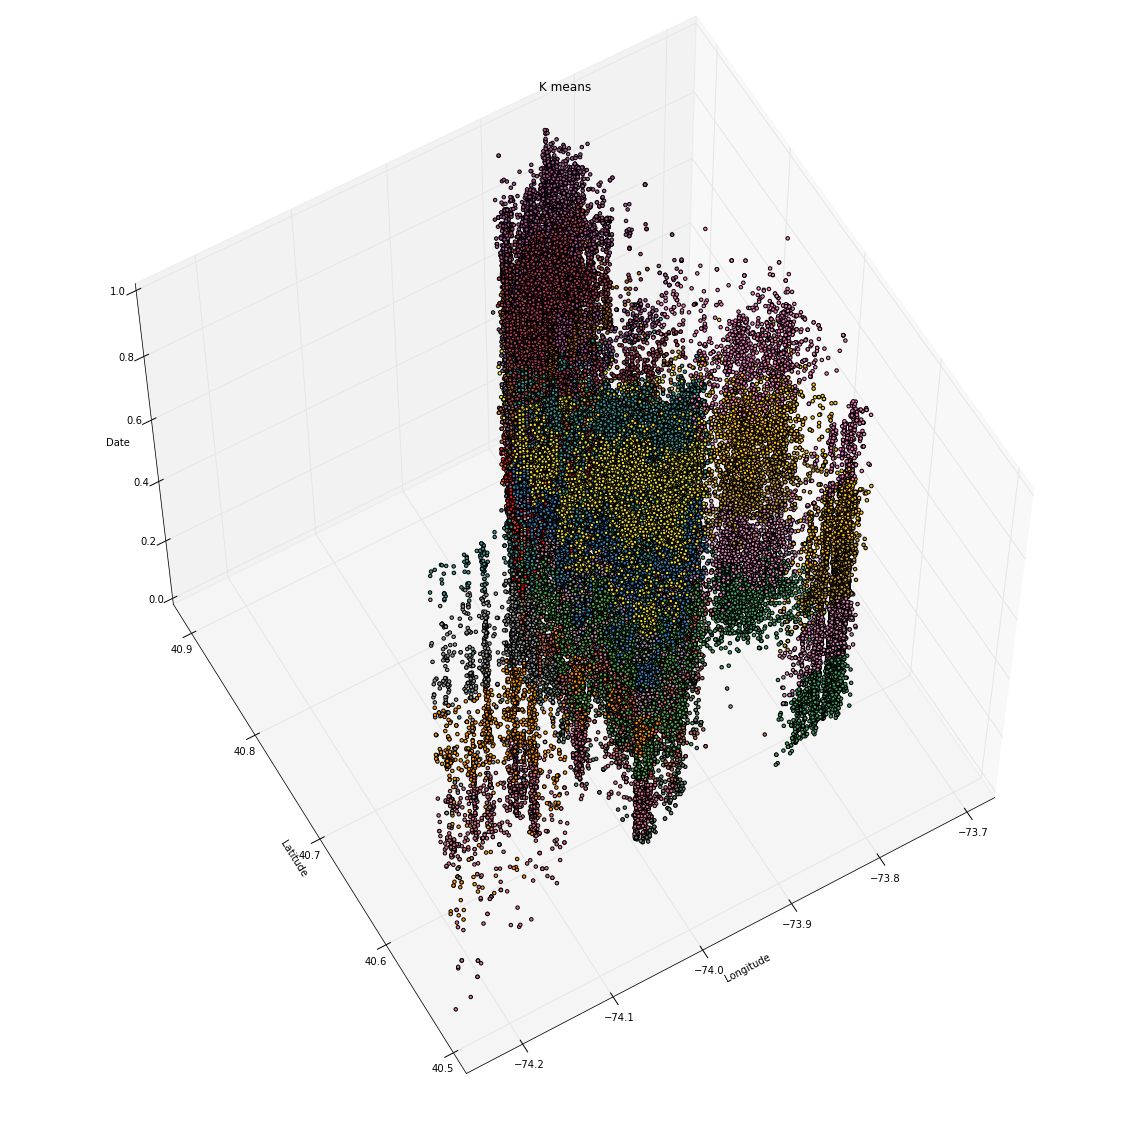

In [81]:
km_model = KMeans(n_clusters = 24)

labelskm = km_model.fit_predict(data1)
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=60., azim=240)
ax.scatter(data1['lon'],data1['lat'], data1['date'], c=labelskm, cmap='Set1',marker='o',s=12,depthshade=False,edgecolor=None);

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Date')
ax.set_title('K means')
ax.set_xlim([-74.25, -73.68])
ax.set_ylim([40.49, 40.92])
ax.set_zlim([0, 1])

(0, 1)

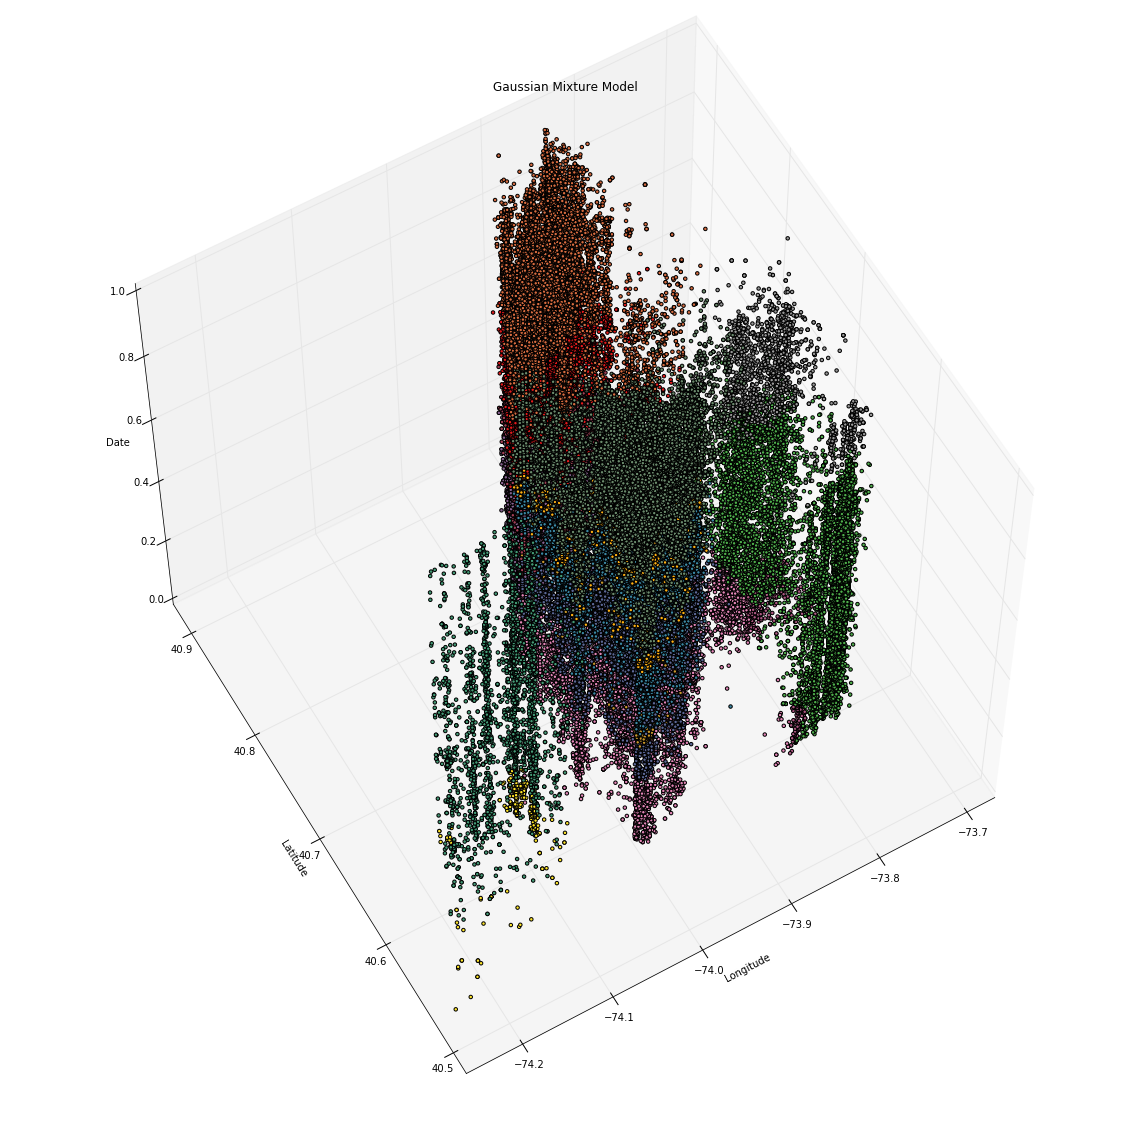

In [82]:
gm_model = GMM(n_components = 24)
gm_fit = gm_model.fit(data1)
labelsgm = gm_fit.predict(data1)
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=60., azim=240)
ax.scatter(data1['lon'],data1['lat'], data1['date'], c=labelsgm, cmap='Set1',marker='o',s=12,depthshade=False,edgecolor=None);

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Date')
ax.set_title('Gaussian Mixture Model')
ax.set_xlim([-74.25, -73.68])
ax.set_ylim([40.49, 40.92])
ax.set_zlim([0, 1])

In this case I used K-means and GMM (Gaussian Mixture Model) for clustering. The use of Date as a 3rd dimension (z-axis), makes the clustering depending to it. In the case of having the days just like a unit (I mean one unit is one day and any fraction is part of hours), the clusters formed in K-means are day based, because Latitude and Longitude are all fractional and the range shown for it is less than one degree. So I decided to scale the date as a fraction of a year, dividing the date minus the minimun date by 366 (2012 was a leap year) and with this fraction of year I could find better clustering. I start using 12 (because 12 months of the year) but it is better to use 24 so there is more dispersion. In GMM it can be seen that the clustering makes more sense spatialy and geographically.